In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.stattools import adfuller
import warnings

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore") # specify to ignore warning messages

# Load dataset

df = pd.read_csv('data/shampoo_sales.csv')



# Display first few rows
df.head()

,Month,Sales
0,2001-01-01,266.00
1,2001-02-01,145.90
2,2001-03-01,183.10
3,2001-04-01,119.30
4,2001-05-01,180.30


In [2]:
#set date as index

df['Month'] = pd.to_datetime(df['Month'])
# Set the date as the index
df.set_index('Month', inplace=True)

In [3]:
df.head()

,Sales
Month,
2001-01-01,266.00
2001-02-01,145.90
2001-03-01,183.10
2001-04-01,119.30
2001-05-01,180.30


In [4]:
# Infer frequency
inferred_freq = df.index.inferred_freq
print(inferred_freq)

MS


<Axes: xlabel='Month'>

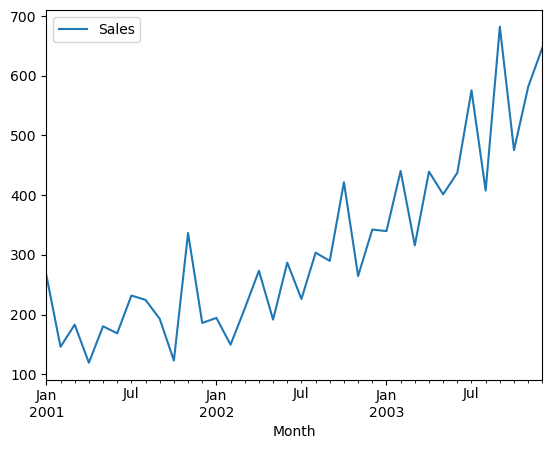

In [5]:
df.plot()

## Walk Forward Validation(rolling-window)

## Sliding Window Approach - Multi Step Ahead Forecast

In [6]:
df

,Sales
Month,
2001-01-01,266.00
2001-02-01,145.90
2001-03-01,183.10
2001-04-01,119.30
2001-05-01,180.30
2001-06-01,168.50
2001-07-01,231.80
2001-08-01,224.50
2001-09-01,192.80


In [7]:
df[0:20]

,Sales
Month,
2001-01-01,266.00
2001-02-01,145.90
2001-03-01,183.10
2001-04-01,119.30
2001-05-01,180.30
2001-06-01,168.50
2001-07-01,231.80
2001-08-01,224.50
2001-09-01,192.80


In [8]:

# # Hyperparameters
context_length = 20  # Initial training period of 10 months
forecast_horizon = 3  # Forecast for 3 months ahead
step_size = 1  # Move the window 1 step forward after each prediction



In [20]:

# results = []

# # Walk-forward validation with a sliding window and multi-horizon forecast
# for t in range(len(df) - context_length - forecast_horizon+1):  # Go through the entire dataset considering the context length and forecast horizon
#     # Define the training history using the first 'context_length' observations
#     history = list(df['Sales'])[:context_length + t]
    
#     # Train ARIMA model (order can be tuned further for better results)
#     model = ARIMA(history, order=(2, 0, 0))  
#     model_fit = model.fit()
    
#     # Forecast `forecast_horizon` steps ahead (3 months)
#     yhat = model_fit.forecast(steps=forecast_horizon)
    
#     # Get the actual values from the test set (up to the forecast horizon)
#     obs = df.iloc[context_length + t:context_length + t + forecast_horizon]['Sales'].values

#     # Store results in table format, including origin point
#     for i in range(len(yhat)):
#         forecast_date = df.index[context_length + t + i]  # Forecast dates should align with the test dates
#         results.append([forecast_date, yhat[i], obs[i], df.index[t]])  # Add origin point

# # Convert results to DataFrame
# eval_df = pd.DataFrame(results, columns=['Forecast Date', 'Forecast', 'Actual', 'Origin Point'])


# # Display evaluation results
# print(eval_df)


   Forecast Date  Forecast  Actual Origin Point
0     2002-09-01    203.85  289.90   2001-01-01
1     2002-10-01    231.32  421.60   2001-01-01
2     2002-11-01    206.44  264.50   2001-01-01
3     2002-10-01    239.91  421.60   2001-02-01
4     2002-11-01    235.49  264.50   2001-02-01
5     2002-12-01    222.51  342.30   2001-02-01
6     2002-11-01    290.97  264.50   2001-03-01
7     2002-12-01    328.76  342.30   2001-03-01
8     2003-01-01    276.19  339.70   2001-03-01
9     2002-12-01    320.77  342.30   2001-04-01
10    2003-01-01    258.09  339.70   2001-04-01
11    2003-02-01    275.17  440.40   2001-04-01
12    2003-01-01    262.54  339.70   2001-05-01
13    2003-02-01    290.03  440.40   2001-05-01
14    2003-03-01    255.14  315.90   2001-05-01
15    2003-02-01    308.36  440.40   2001-06-01
16    2003-03-01    301.43  315.90   2001-06-01
17    2003-04-01    285.12  439.30   2001-06-01
18    2003-03-01    345.19  315.90   2001-07-01
19    2003-04-01    377.48  439.30   200

In [9]:
# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [10]:
# Store the results and errors
results = []
fold_errors = []

# Walk-forward validation with a sliding window and multi-horizon forecast
for t in range(len(df) - context_length - forecast_horizon+1):  # Go through the entire dataset considering the context length and forecast horizon
    # Define the training history using the first 'context_length' observations
    history = list(df['Sales'])[:context_length + t]
    
    # Train ARIMA model (order can be tuned further for better results)
    model = ARIMA(history, order=(2, 0, 0))  
    model_fit = model.fit()
    
    # Forecast `forecast_horizon` steps ahead (3 months)
    yhat = model_fit.forecast(steps=forecast_horizon)
    
    # Get the actual values from the test set (up to the forecast horizon)
    obs = df.iloc[context_length + t:context_length + t + forecast_horizon]['Sales'].values
    
    # Calculate error metrics
    mae = mean_absolute_error(obs, yhat)
    mse = mean_squared_error(obs, yhat)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(obs, yhat)
    
    fold_errors.append((mae, mse, rmse, mape))
    
    # Store results in table format, including origin point
    for i in range(len(yhat)):
        forecast_date = df.index[context_length + t + i]  # Forecast dates should align with the test dates
        results.append([forecast_date, yhat[i], obs[i], df.index[t]])  # Add origin point

# Convert results to DataFrame
eval_df = pd.DataFrame(results, columns=['Forecast Date', 'Forecast', 'Actual', 'Origin Point'])

# Compute average error metrics over all windows
mae_cv = np.mean([err[0] for err in fold_errors])
mse_cv = np.mean([err[1] for err in fold_errors])
rmse_cv = np.mean([err[2] for err in fold_errors])
mape_cv = np.mean([err[3] for err in fold_errors])

# Display evaluation results
print(eval_df)

# Print cross-validated metrics
print(f"\nCross-validated MAE: {mae_cv:.2f}")
print(f"Cross-validated MSE: {mse_cv:.2f}")
print(f"Cross-validated RMSE: {rmse_cv:.2f}")
print(f"Cross-validated MAPE: {mape_cv:.2f}%")


   Forecast Date  Forecast  Actual Origin Point
0     2002-09-01    203.85  289.90   2002-09-01
1     2002-10-01    231.32  421.60   2002-09-01
2     2002-11-01    206.44  264.50   2002-09-01
3     2002-10-01    239.91  421.60   2002-10-01
4     2002-11-01    235.49  264.50   2002-10-01
5     2002-12-01    222.51  342.30   2002-10-01
6     2002-11-01    290.97  264.50   2002-11-01
7     2002-12-01    328.76  342.30   2002-11-01
8     2003-01-01    276.19  339.70   2002-11-01
9     2002-12-01    320.77  342.30   2002-12-01
10    2003-01-01    258.09  339.70   2002-12-01
11    2003-02-01    275.17  440.40   2002-12-01
12    2003-01-01    262.54  339.70   2003-01-01
13    2003-02-01    290.03  440.40   2003-01-01
14    2003-03-01    255.14  315.90   2003-01-01
15    2003-02-01    308.36  440.40   2003-02-01
16    2003-03-01    301.43  315.90   2003-02-01
17    2003-04-01    285.12  439.30   2003-02-01
18    2003-03-01    345.19  315.90   2003-03-01
19    2003-04-01    377.48  439.30   200

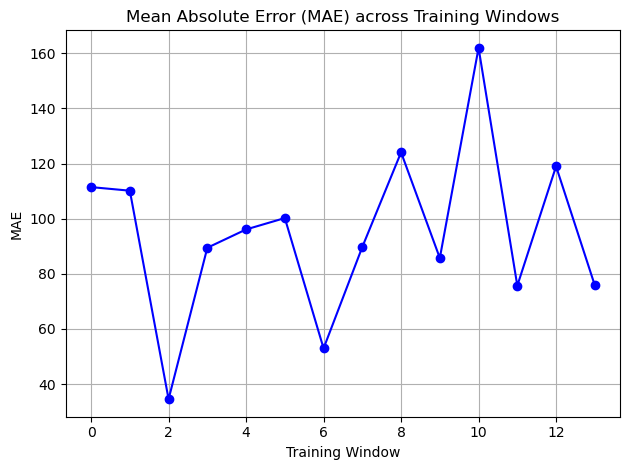

In [11]:

# Extract error metrics for plotting
mae_vals = [err[0] for err in fold_errors]
mse_vals = [err[1] for err in fold_errors]
rmse_vals = [err[2] for err in fold_errors]
mape_vals = [err[3] for err in fold_errors]

# Generate a range of training windows (one for each fold)
folds = range(len(fold_errors))

# # Plot the error metrics across training windows
# plt.figure(figsize=(12, 8))

# # Plot MAE
# plt.subplot(2, 1, 1)
plt.plot(folds, mae_vals, color='blue', marker='o', linestyle='-', label='MAE')
plt.title('Mean Absolute Error (MAE) across Training Windows')
plt.xlabel('Training Window')
plt.ylabel('MAE')
plt.grid(True)

# # Plot MSE
# plt.subplot(2, 2, 2)
# plt.plot(folds, mse_vals, color='red', marker='o', linestyle='-', label='MSE')
# plt.title('Mean Squared Error (MSE) across Training Windows')
# plt.xlabel('Training Window')
# plt.ylabel('MSE')
# plt.grid(True)

# # Plot RMSE
# plt.subplot(2, 2, 3)
# plt.plot(folds, rmse_vals, color='green', marker='o', linestyle='-', label='RMSE')
# plt.title('Root Mean Squared Error (RMSE) across Training Windows')
# plt.xlabel('Training Window')
# plt.ylabel('RMSE')
# plt.grid(True)

# # Plot MAPE
# plt.subplot(2, 2, 4)
# plt.plot(folds, mape_vals, color='orange', marker='o', linestyle='-', label='MAPE')
# plt.title('Mean Absolute Percentage Error (MAPE) across Training Windows')
# plt.xlabel('Training Window')
# plt.ylabel('MAPE (%)')
# plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

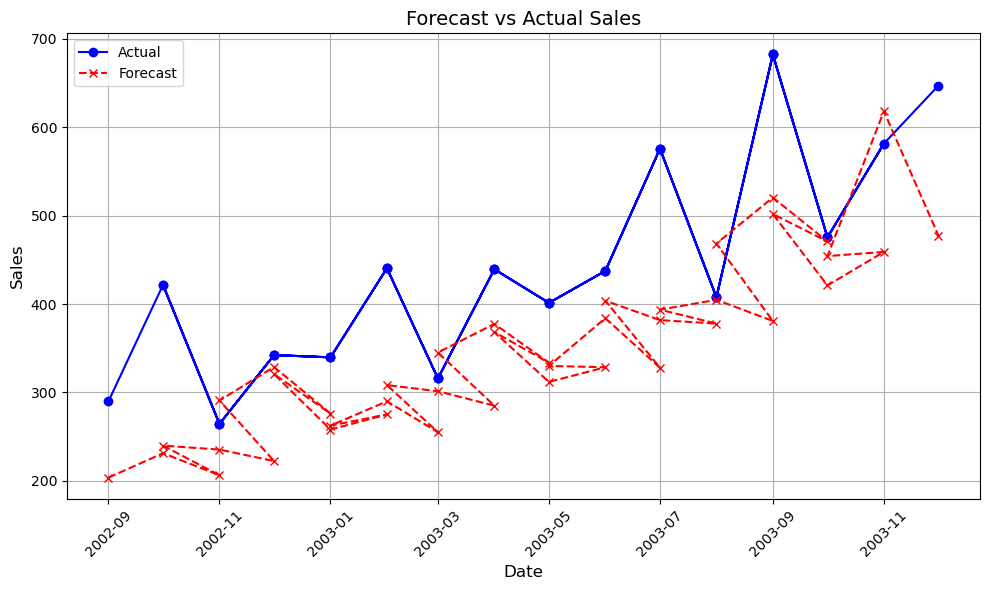

In [12]:

# Plot the forecasted vs actual values
plt.figure(figsize=(10, 6))

# Plot the actual values
plt.plot(eval_df['Forecast Date'], eval_df['Actual'], color='blue', label='Actual', linestyle='-', marker='o')

# Plot the forecasted values
plt.plot(eval_df['Forecast Date'], eval_df['Forecast'], color='red', label='Forecast', linestyle='--', marker='x')

# Adding titles and labels
plt.title('Forecast vs Actual Sales', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend()

# Show the plot
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()